In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance

In [2]:
#load data
data = load_breast_cancer()

x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["target"])

print(data.data.shape)
print(data.target.shape)

(569, 30)
(569,)


In [3]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#data cleaning

#check datatypes
#strip whitespace from categorical features
x.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [5]:
#check unique values
#df.nunique()
#all features are continuous 

In [6]:
#check for NAs
x.isnull().sum()
y.isnull().sum()

target    0
dtype: int64

In [7]:
#train test split before filling in NAs

x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426, 1)
(143, 1)


In [8]:
#EDA
x_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 134 to 59
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              426 non-null    float64
 1   mean texture             426 non-null    float64
 2   mean perimeter           426 non-null    float64
 3   mean area                426 non-null    float64
 4   mean smoothness          426 non-null    float64
 5   mean compactness         426 non-null    float64
 6   mean concavity           426 non-null    float64
 7   mean concave points      426 non-null    float64
 8   mean symmetry            426 non-null    float64
 9   mean fractal dimension   426 non-null    float64
 10  radius error             426 non-null    float64
 11  texture error            426 non-null    float64
 12  perimeter error          426 non-null    float64
 13  area error               426 non-null    float64
 14  smoothness error         

In [9]:
x_train.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
mean radius,426.0,14.12,3.54,6.98,11.54,13.29,16.06,27.42
mean texture,426.0,19.42,4.39,9.71,16.15,19.11,22.02,33.81
mean perimeter,426.0,91.92,24.41,43.79,74.21,86.16,105.78,186.90
mean area,426.0,653.92,349.06,143.50,406.65,544.50,801.78,2501.00
mean smoothness,426.0,0.10,0.01,0.05,0.09,0.09,0.11,0.16
mean compactness,426.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
mean concavity,426.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
mean concave points,426.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
mean symmetry,426.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
mean fractal dimension,426.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [10]:
y_train.value_counts(normalize=True)

target
1         0.631455
0         0.368545
dtype: float64

C:\Users\egrah\AppData\Local\Temp\ipykernel_6964\2520637543.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1)


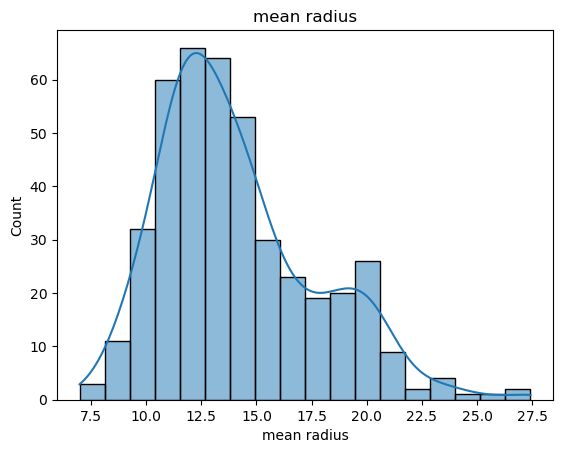

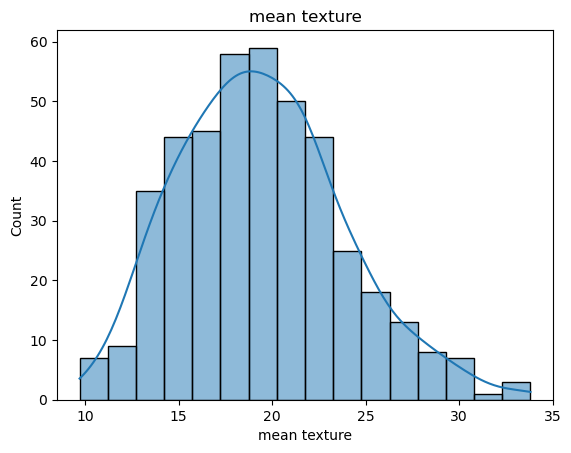

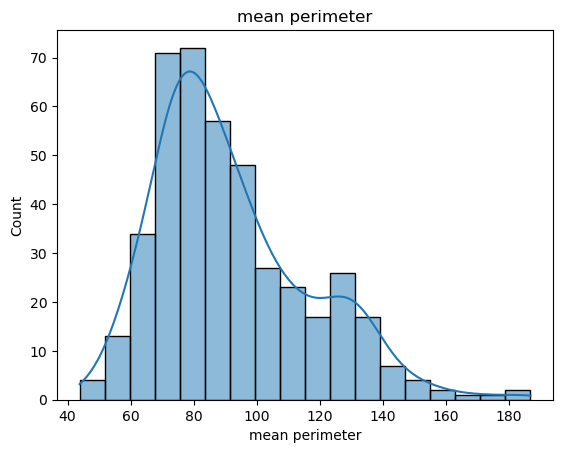

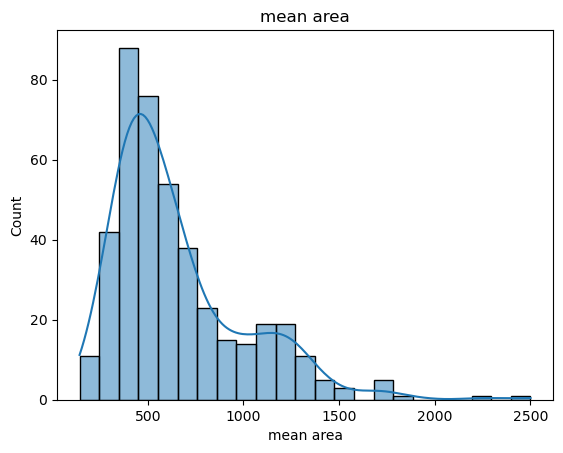

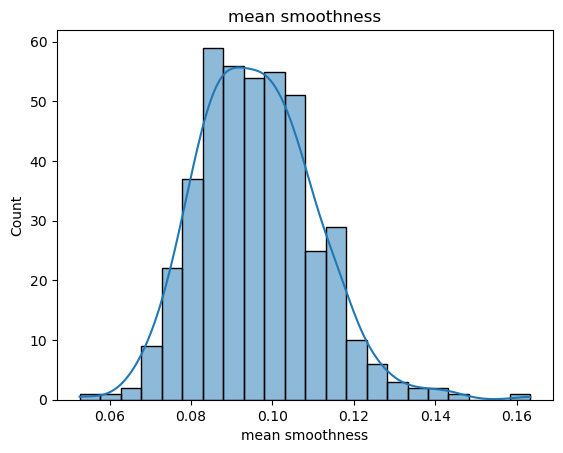

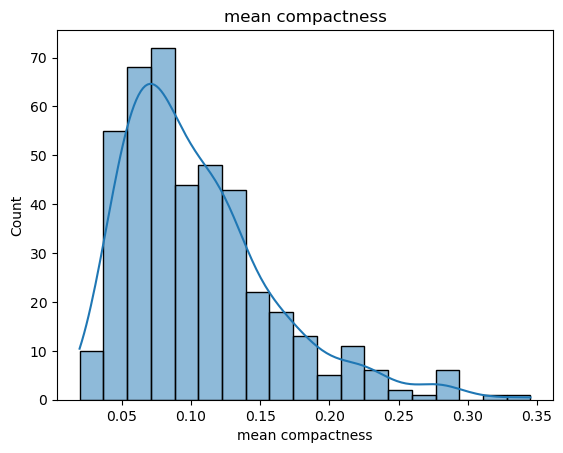

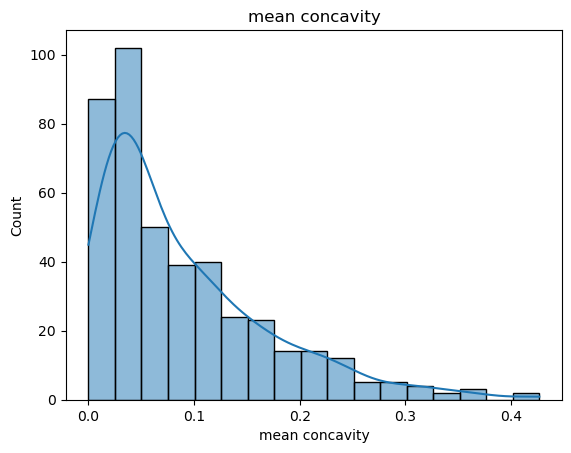

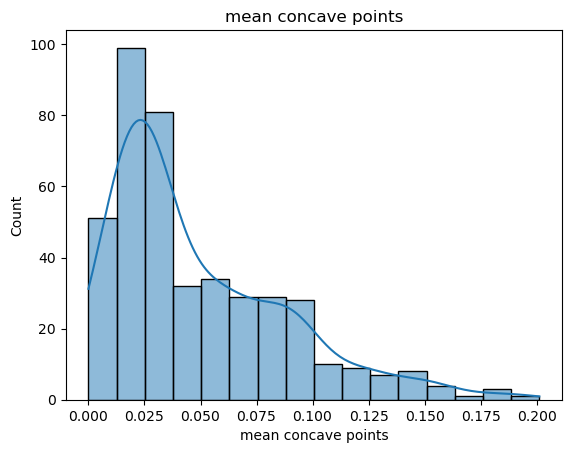

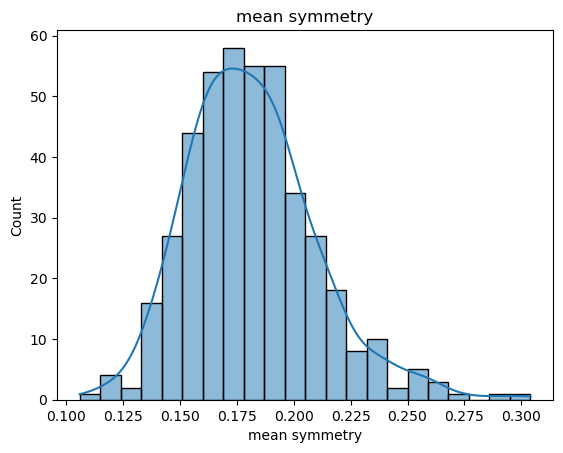

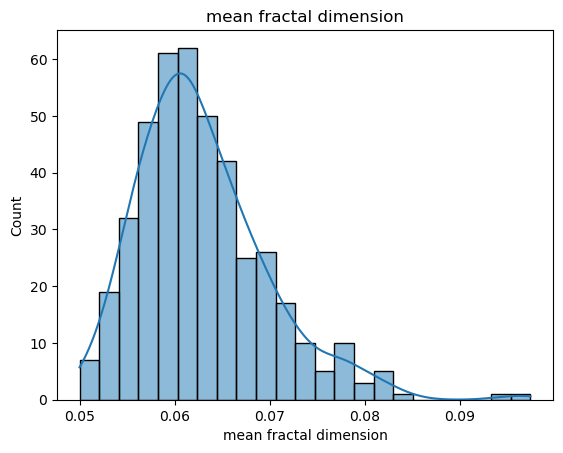

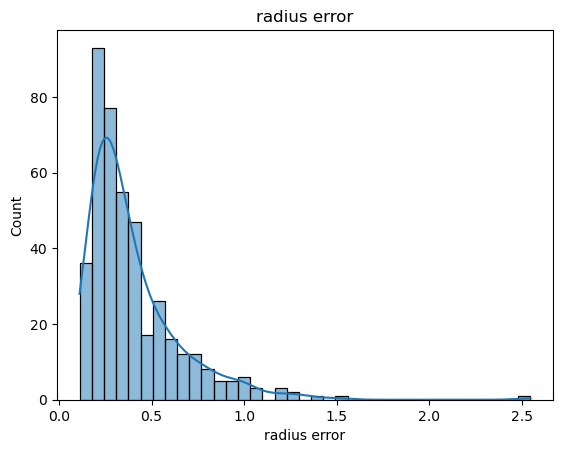

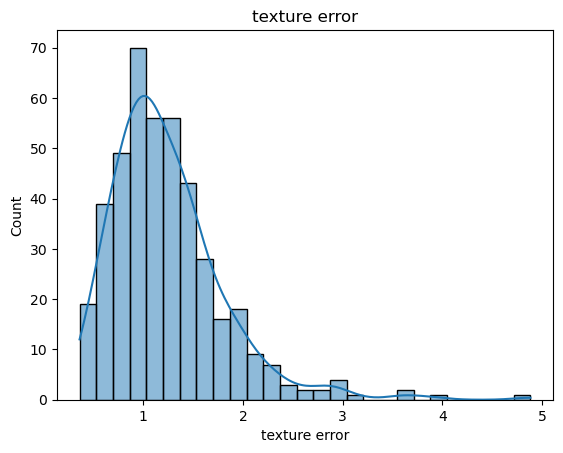

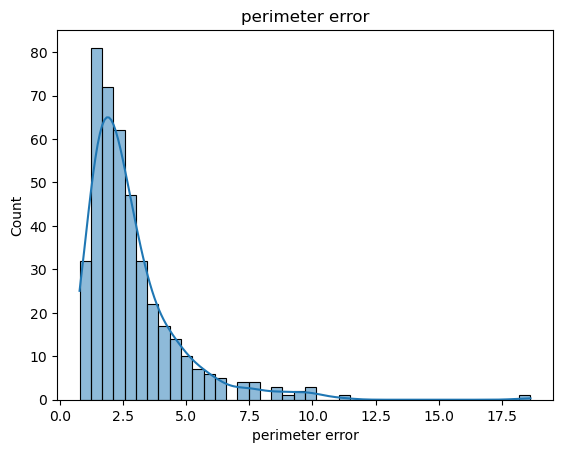

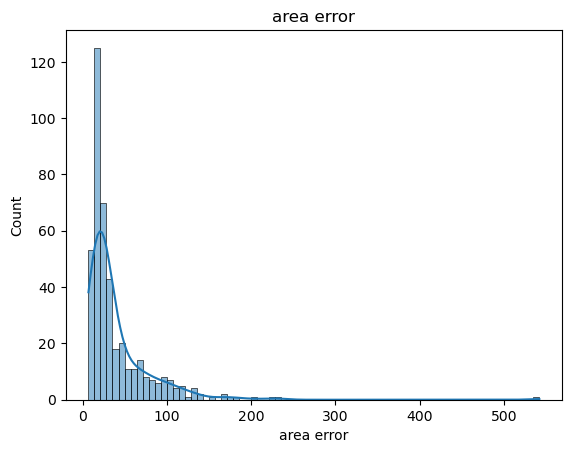

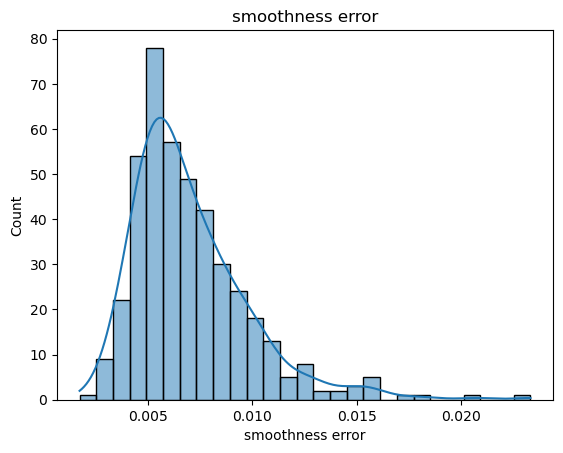

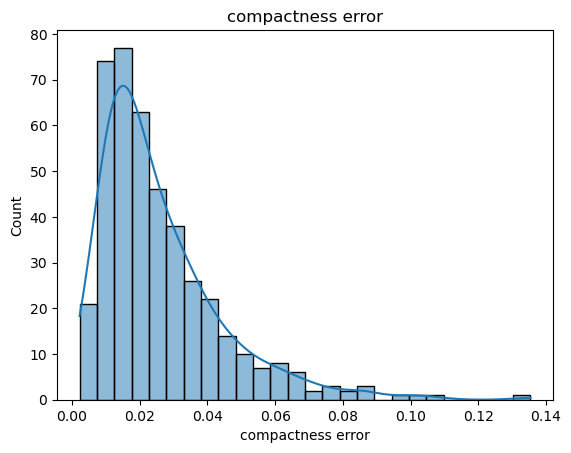

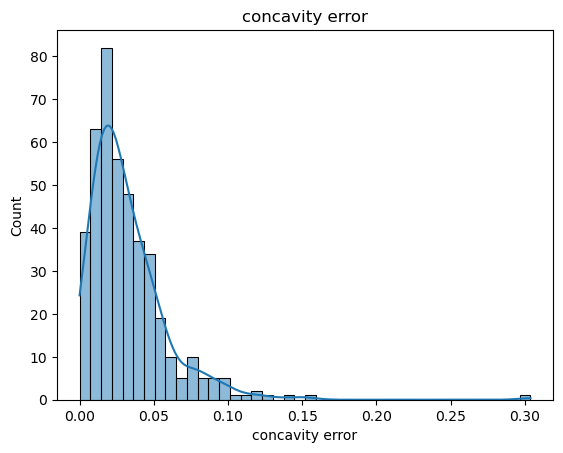

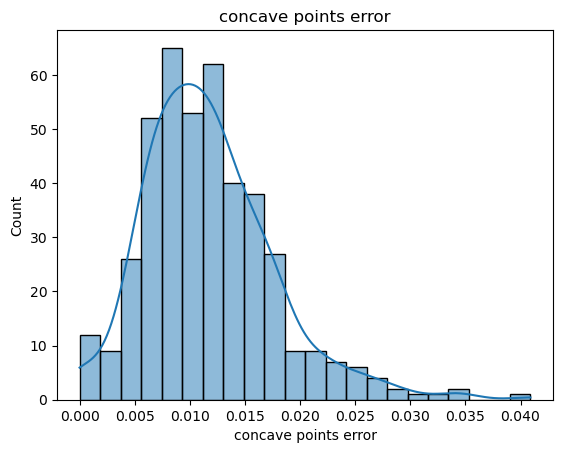

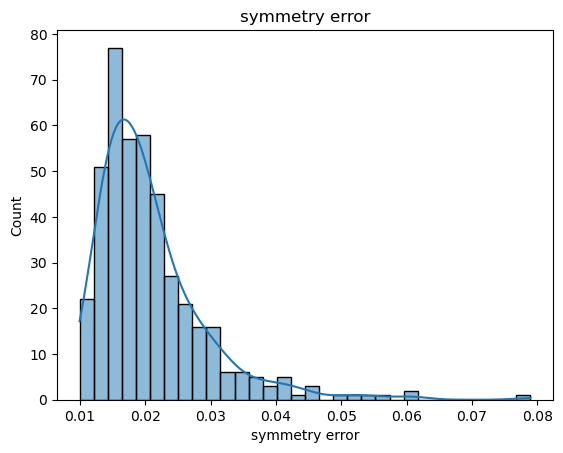

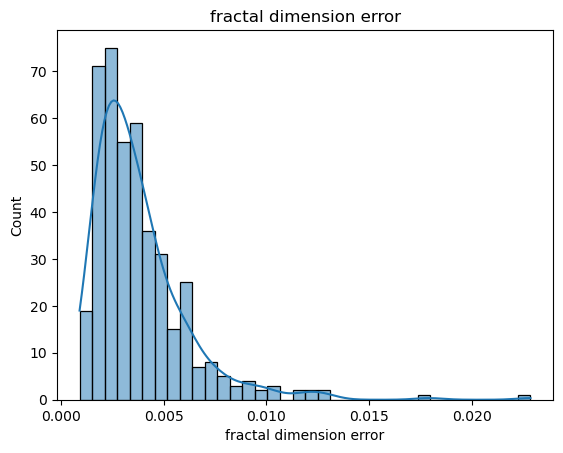

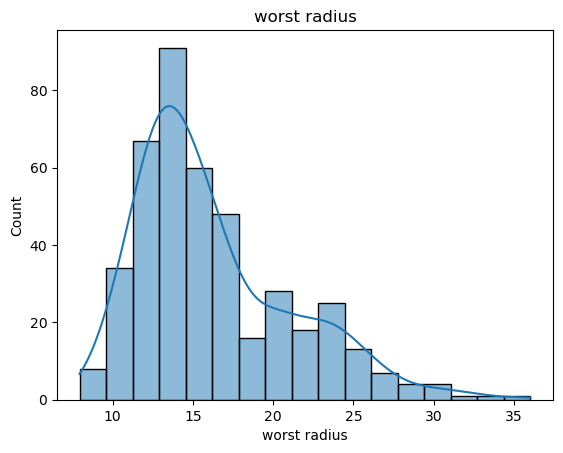

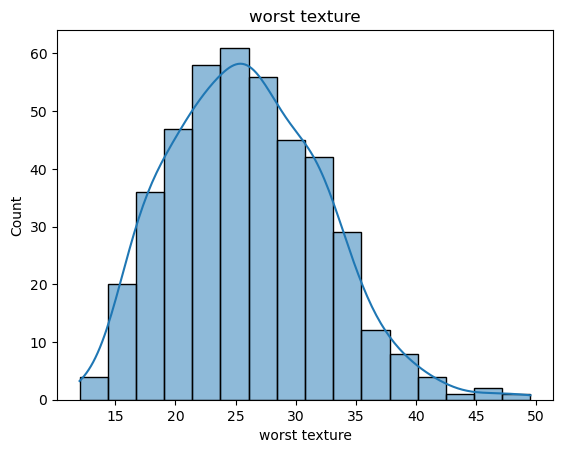

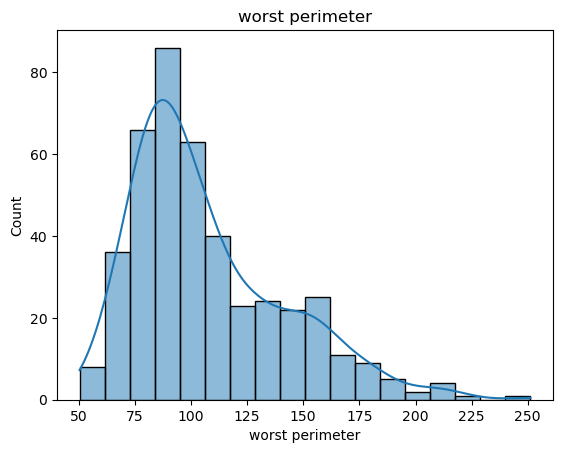

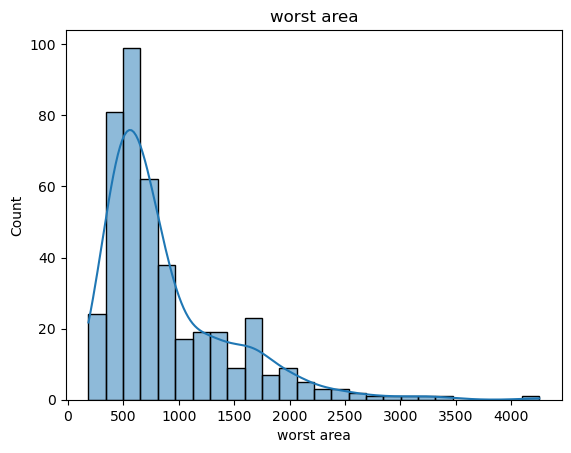

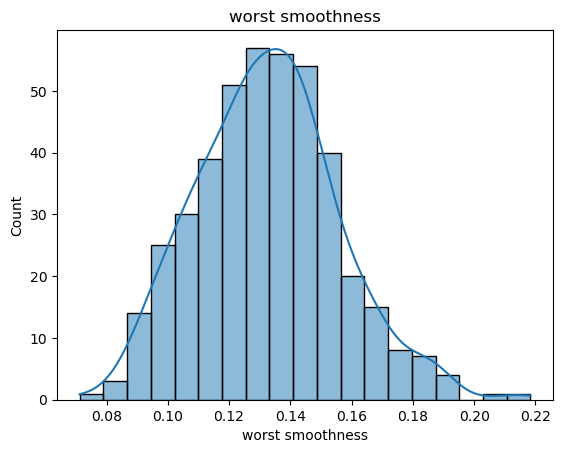

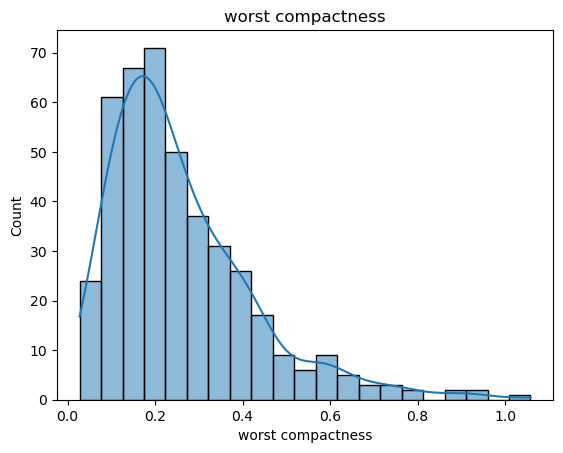

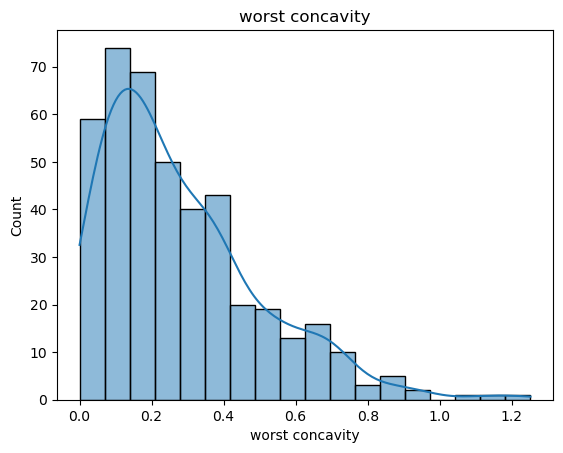

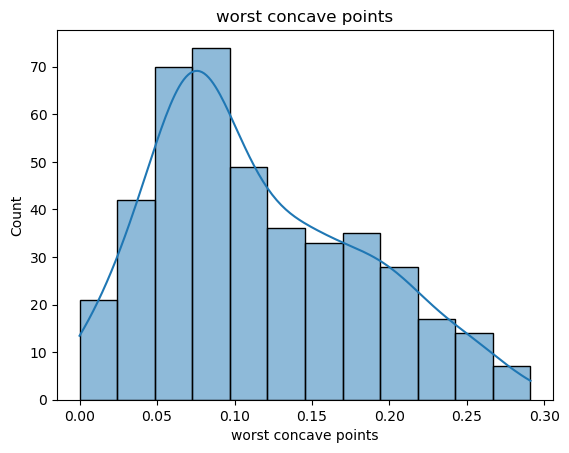

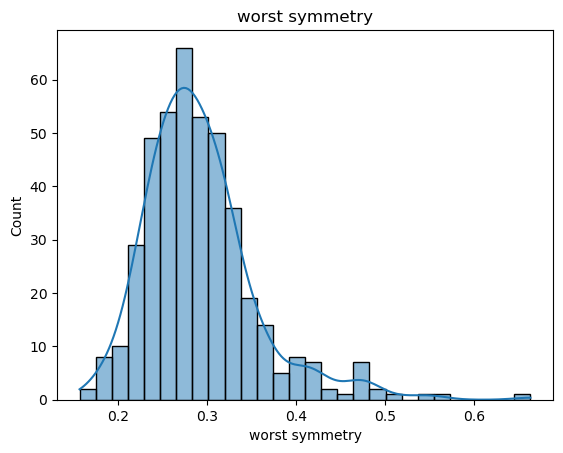

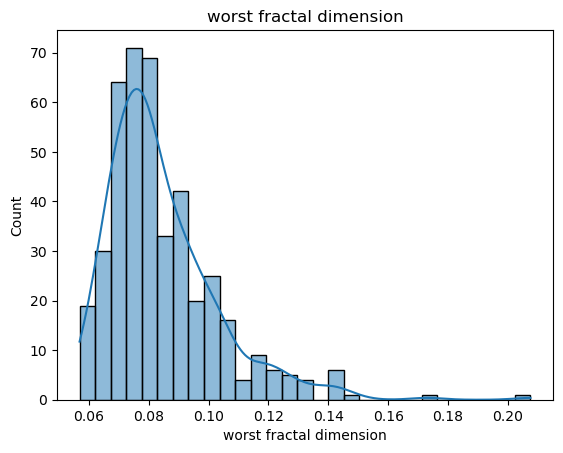

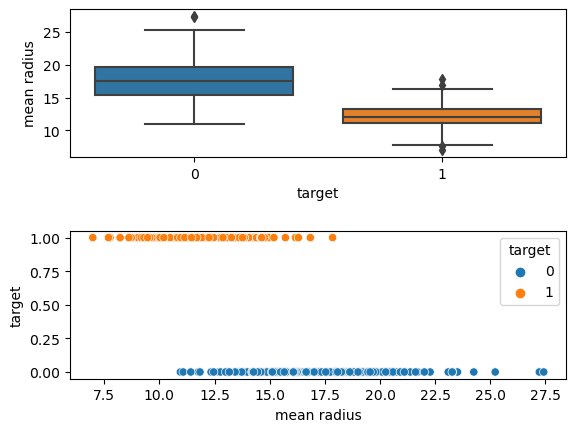

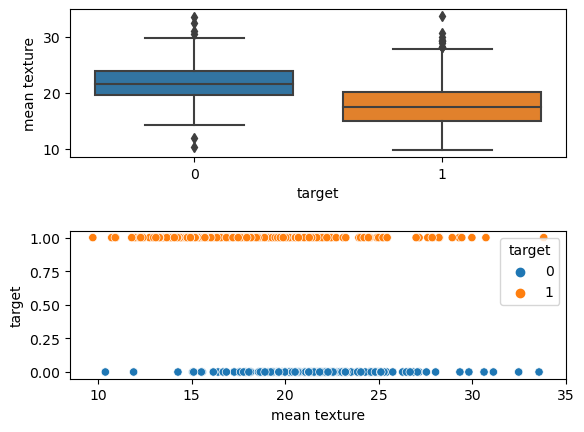

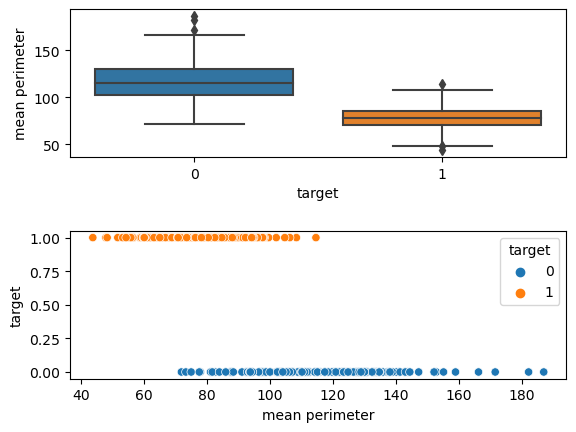

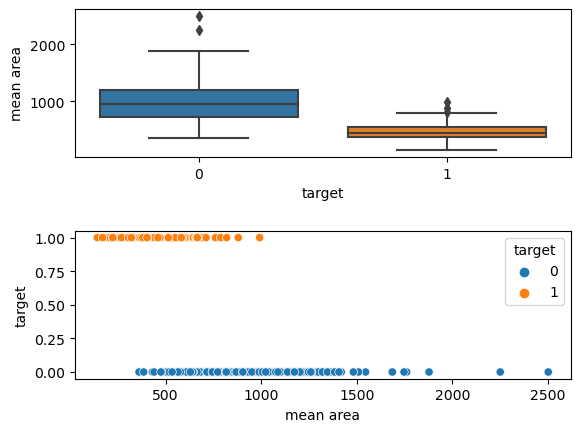

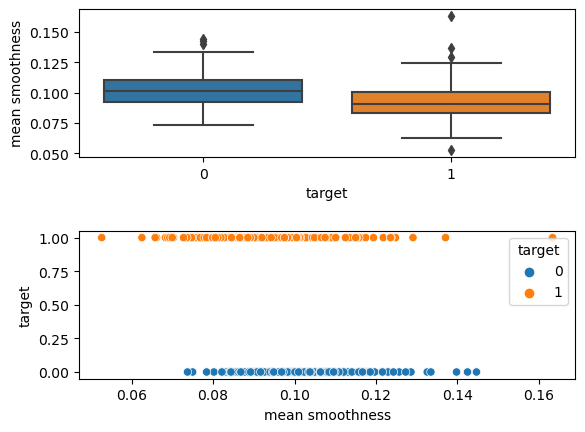

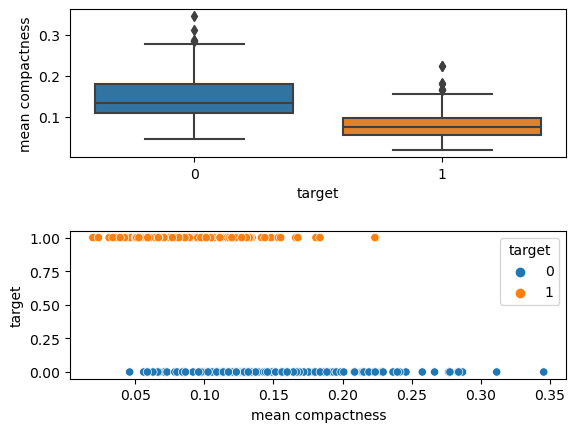

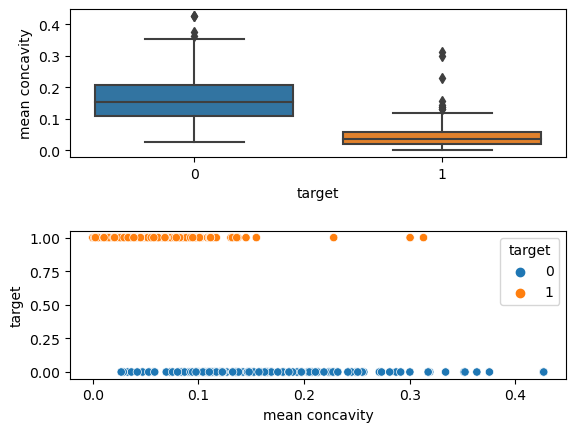

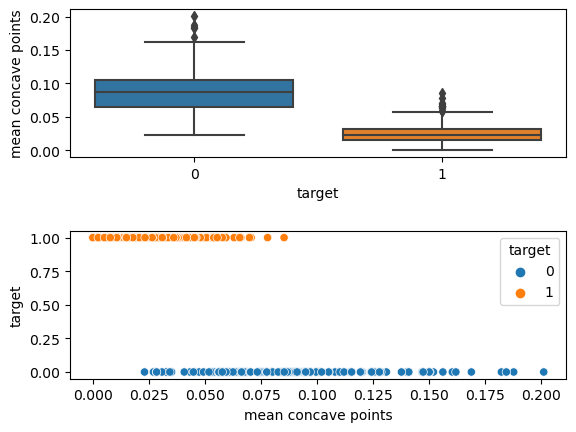

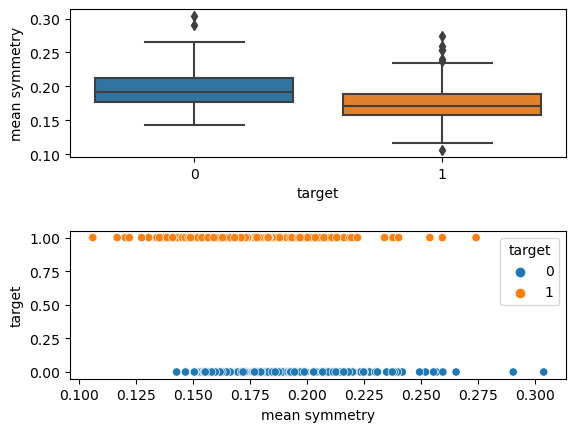

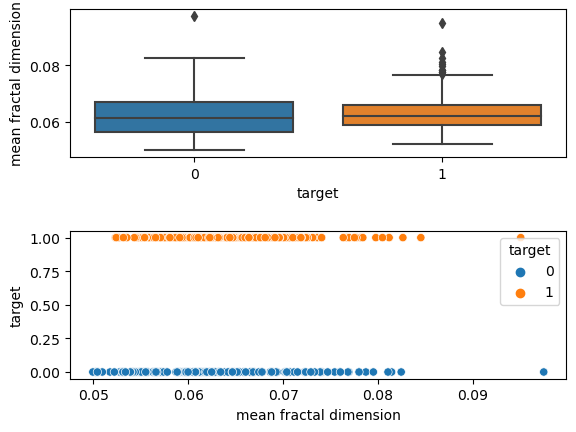

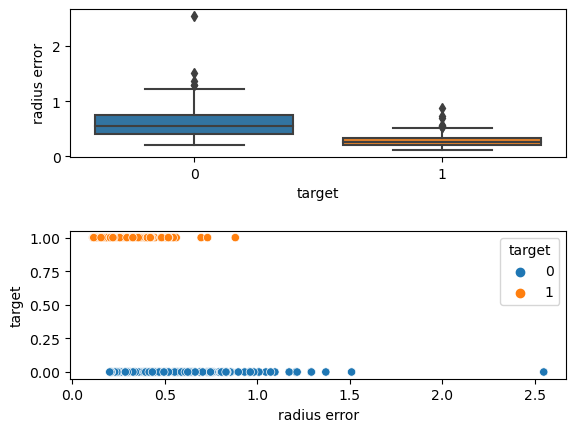

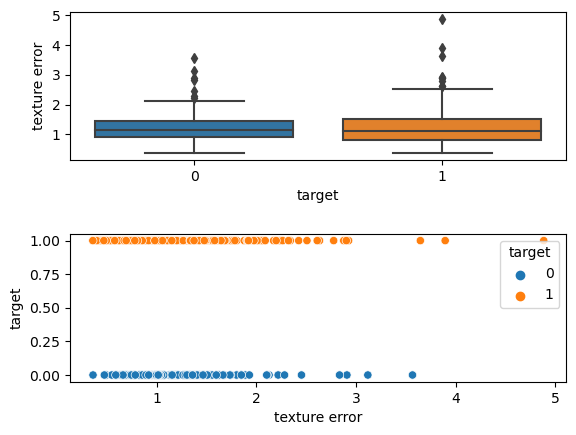

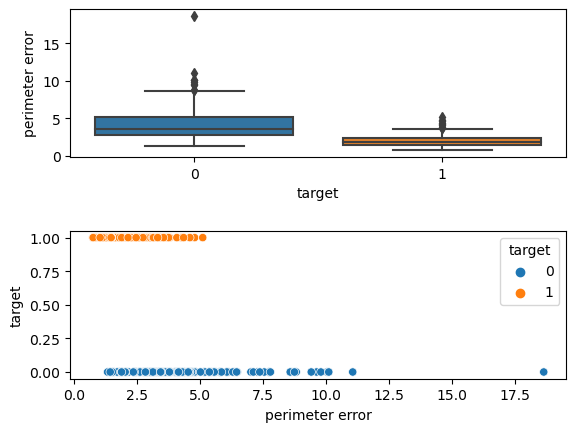

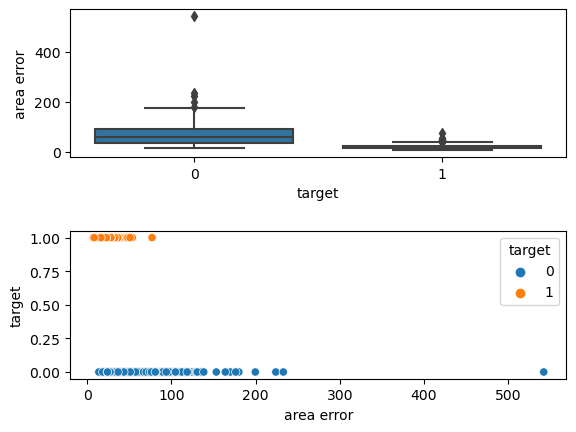

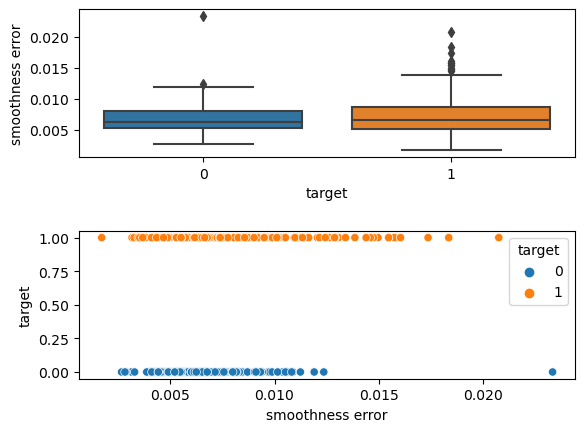

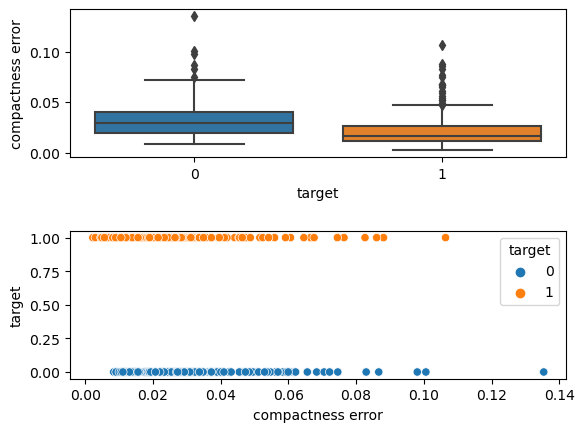

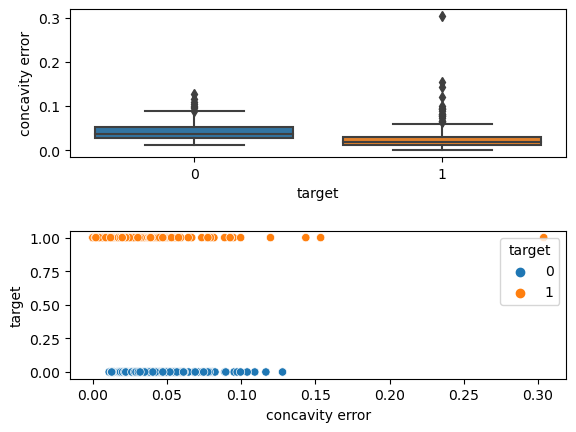

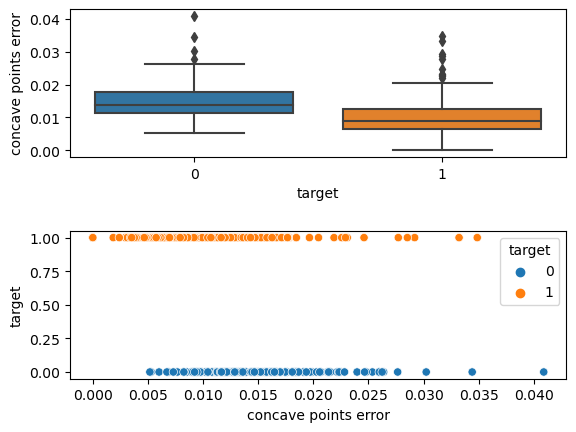

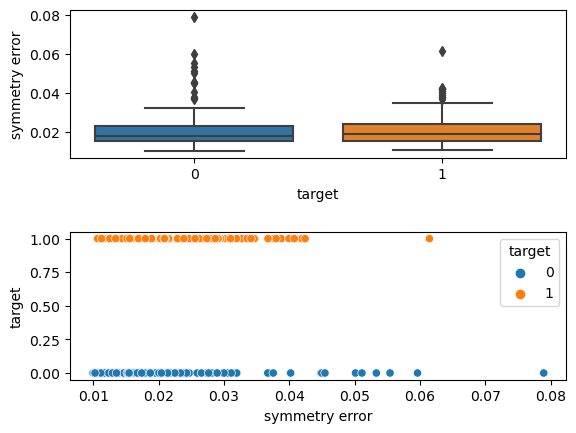

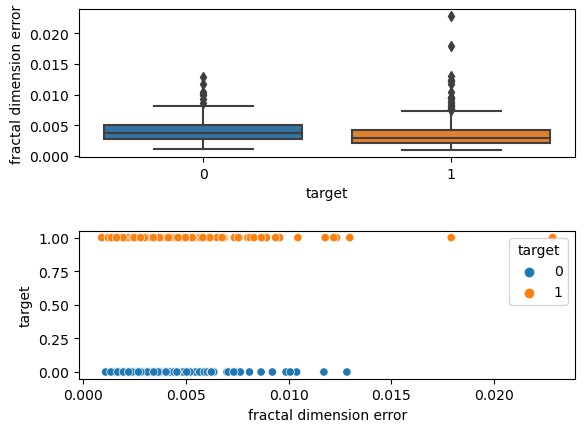

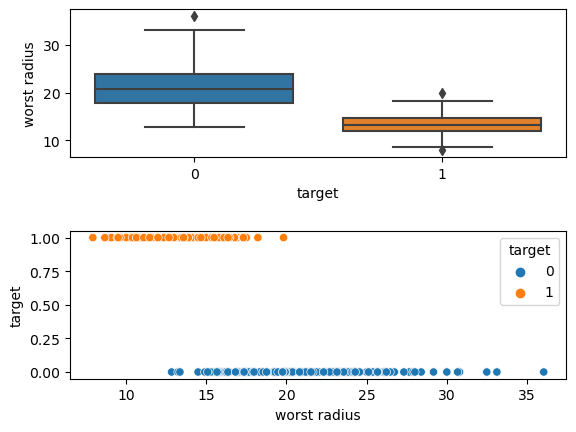

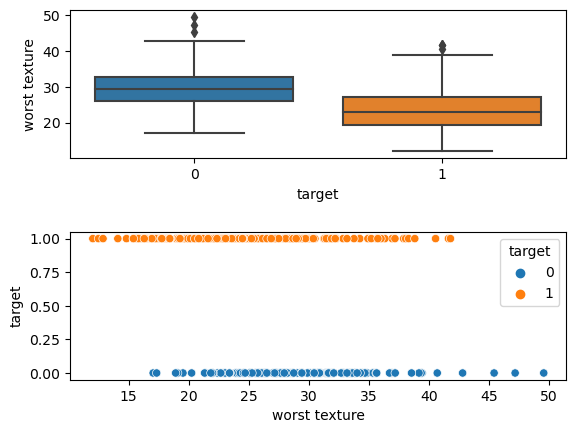

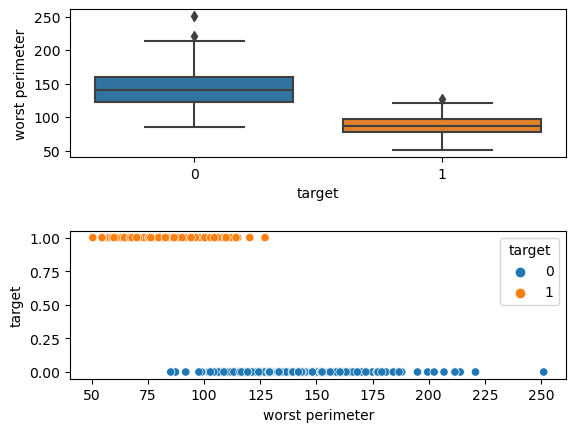

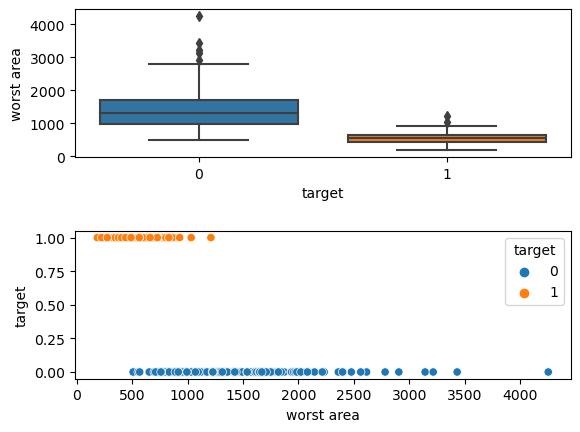

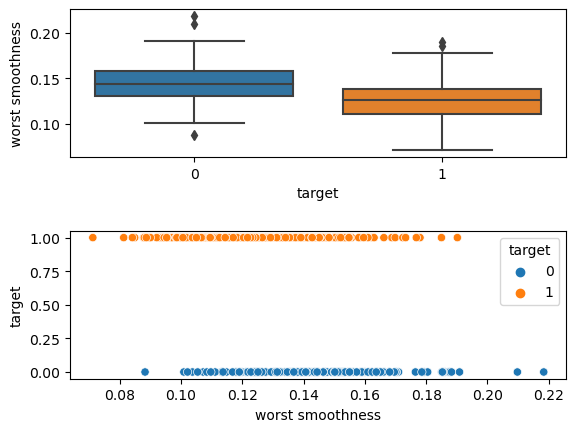

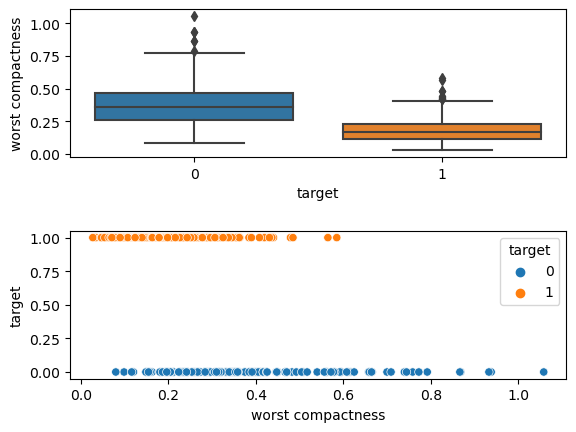

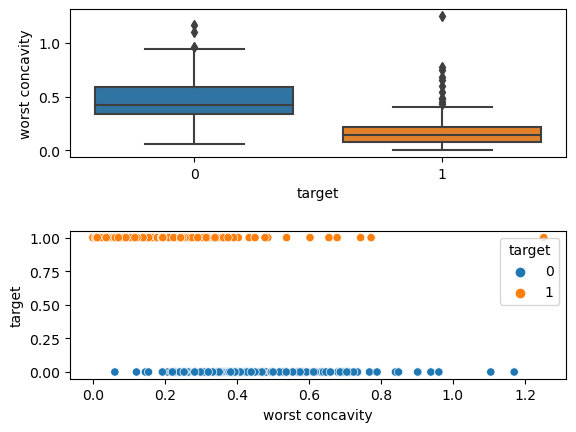

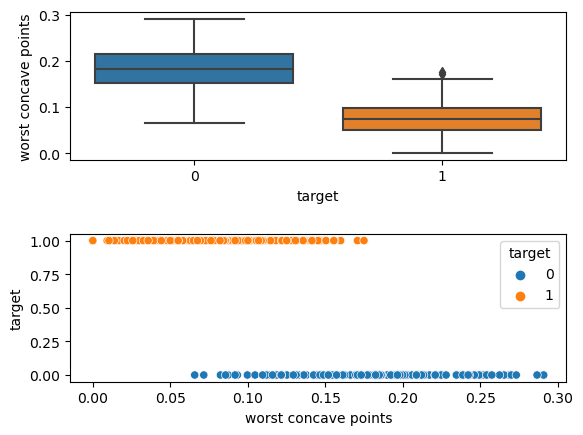

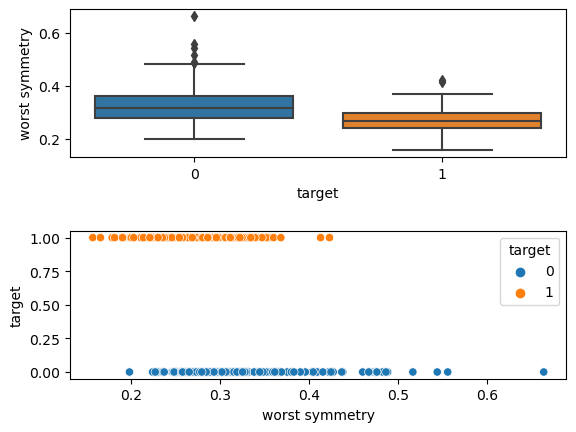

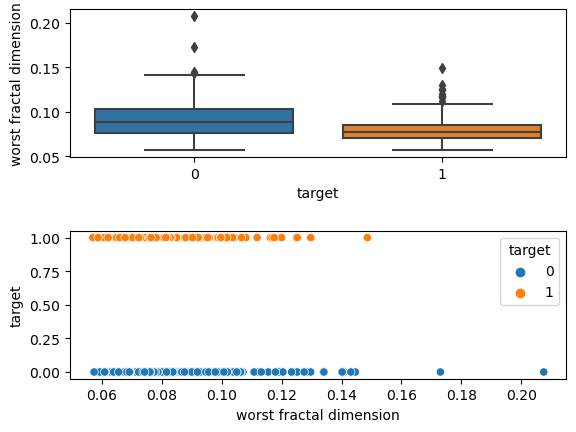

In [11]:
#vizualize relationships

#univariate
for i in x_train.columns.tolist():
    fig, ax = plt.subplots(1,1)
    sns.histplot(x_train[i], kde=True)
    ax.set_title(i)
    

concatenated = pd.concat([x_train.assign(dataset='set1'), y_train.assign(dataset='set2')], axis=1).drop(columns=["dataset"])

#bivariate
for i in x_train.columns.tolist():
 
    fig, ax = plt.subplots(2,1)
    plt.subplots_adjust(wspace=0.5, hspace=.5)
    sns.boxplot(data=concatenated,x="target", y=i, ax=ax[0])
    sns.scatterplot(data=concatenated, x=i, y="target", hue="target", ax=ax[1])
    
    plt.show()

In [12]:
#observe any outliers to which standardizing features will be sensative to using tukey fences
for i in x_train.columns.tolist():
    
    Q1 = x_train[i].quantile(.25)
    Q3 = x_train[i].quantile(.75)
    IQR = Q3-Q1
    
    outliers = x_train[(x_train[i]<(Q1-IQR*1.5)) | (x_train[i]> Q3+(IQR*1.5))]
    print(i + ": " + str(len(outliers[i])) + " outliers")


mean radius: 8 outliers
mean texture: 4 outliers
mean perimeter: 6 outliers
mean area: 14 outliers
mean smoothness: 6 outliers
mean compactness: 14 outliers
mean concavity: 16 outliers
mean concave points: 15 outliers
mean symmetry: 13 outliers
mean fractal dimension: 12 outliers
radius error: 24 outliers
texture error: 15 outliers
perimeter error: 26 outliers
area error: 46 outliers
smoothness error: 17 outliers
compactness error: 20 outliers
concavity error: 18 outliers
concave points error: 13 outliers
symmetry error: 24 outliers
fractal dimension error: 22 outliers
worst radius: 8 outliers
worst texture: 3 outliers
worst perimeter: 9 outliers
worst area: 23 outliers
worst smoothness: 4 outliers
worst compactness: 16 outliers
worst concavity: 10 outliers
worst concave points: 0 outliers
worst symmetry: 20 outliers
worst fractal dimension: 20 outliers


In [13]:
#standardize features
scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train),columns = x_train.columns)

x_test = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

print(x_train)
print(x_test)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       1.226908      0.567999        1.159905   1.207752        -0.127850   
1       0.117119     -1.240315        0.079624  -0.027873         0.951527   
2      -0.355673     -1.390818       -0.373159  -0.427702         1.193696   
3      -0.599147      2.009177       -0.621288  -0.606392        -0.814916   
4      -1.208681     -0.852657       -1.186036  -1.034615        -0.084952   
..           ...           ...             ...        ...              ...   
421    -0.752026     -0.287131       -0.751709  -0.719399        -0.527082   
422     1.977147      0.251031        1.894037   2.094029         0.047894   
423     2.121533      0.652372        2.152419   2.159997         1.422025   
424    -0.528370     -0.337298       -0.559768  -0.555337        -0.664772   
425    -1.556622     -1.739711       -1.541208  -1.231661         0.094944   

     mean compactness  mean concavity  mean concave points  mea

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'baseline accuracy': 0.958041958041958}
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        55
      benign       0.95      0.99      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



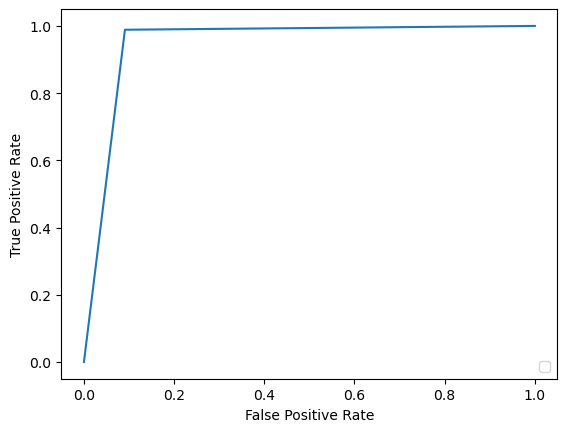

In [14]:
#train baseline
def display_metrics(y_test, y_preds, target_names):
    print(classification_report(y_test, y_preds, target_names=target_names))

    fpr, tpr, thresholds = roc_curve(y_test, y_preds)
    roc_auc = auc(fpr, tpr)

    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()
    

scores = dict()

model = SVC()

model.fit(x_train, y_train)

y_preds = model.predict(x_test)

scores["baseline accuracy"] = accuracy_score(y_test, y_preds)

print(scores)


display_metrics(y_test, y_preds, data.target_names)

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'selector__k': 30}
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        55
      benign       0.95      0.99      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



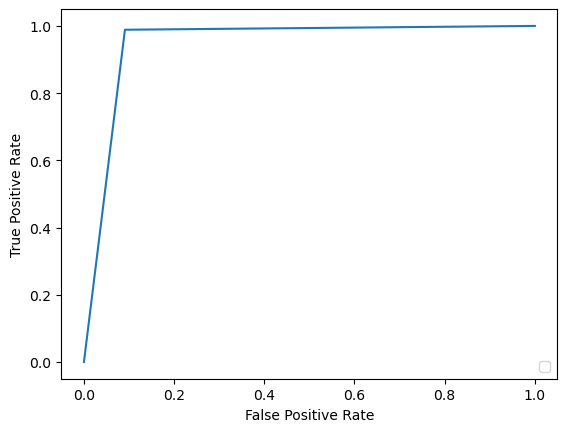

{'baseline accuracy': 0.958041958041958, "K best Features: {'selector__k': 30}": 0.958041958041958}


In [15]:
#feature selection

#selectk best

kf = KFold(n_splits=4)

model = SVC()
pipeline = Pipeline([("selector", SelectKBest(f_classif)), ("model", model)])


params = {"selector__k":[5, 10, 15, 20, 25, 30]}

clf = GridSearchCV(estimator=pipeline, param_grid=params, cv=kf, scoring="accuracy")

clf.fit(x_train, y_train)

print(clf.best_params_)
print(clf.best_estimator_.named_steps.selector.get_feature_names_out().tolist())

model = SVC()
model.fit(x_train[clf.best_estimator_.named_steps.selector.get_feature_names_out().tolist()], y_train)

y_preds = model.predict(x_test[clf.best_estimator_.named_steps.selector.get_feature_names_out().tolist()])

display_metrics(y_test, y_preds, data.target_names)

scores["K best Features: " + str(clf.best_params_)] = accuracy_score(y_test, y_preds)

print(scores)


C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'selector__n_features_to_select': 30}
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
              precision    recall  f1-score   support

   malignant       0.98      0.91      0.94        55
      benign       0.95      0.99      0.97        88

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



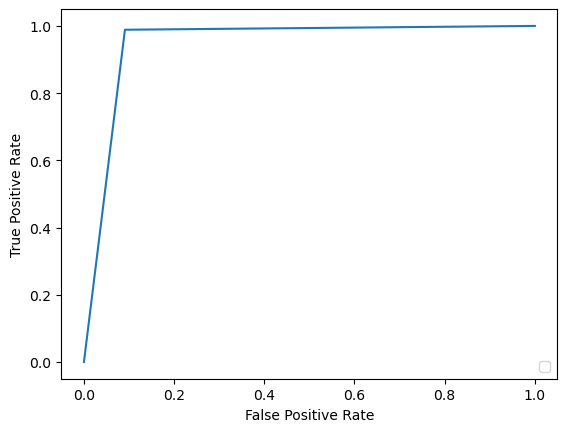

{'baseline accuracy': 0.958041958041958, "K best Features: {'selector__k': 30}": 0.958041958041958, "RFE Best Features: {'selector__n_features_to_select': 30}": 0.958041958041958}


In [16]:
#RFE Feature Selection

model = SVC()

pipeline = Pipeline(steps=[("selector", RFE(model)), ("model", model)])

params = {"selector__n_features_to_select":[5, 10, 15, 20, 25, 30]}

clf = GridSearchCV(estimator=pipeline, param_grid = params, cv=kf,scoring="accuracy")

clf.fit(x_train, y_train)

print(clf.best_params_)
print(clf.best_estimator_.named_steps.selector.get_feature_names_out().tolist())

model = SVC()
model.fit(x_train[clf.best_estimator_.named_steps.selector.get_feature_names_out().tolist()], y_train)

y_preds = model.predict(x_test[clf.best_estimator_.named_steps.selector.get_feature_names_out().tolist()])

display_metrics(y_test, y_preds, data.target_names)

scores["RFE Best Features: " + str(clf.best_params_)] = accuracy_score(y_test, y_preds)

print(scores)

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

              precision    recall  f1-score   support

   malignant       1.00      0.89      0.94        55
      benign       0.94      1.00      0.97        88

    accuracy                           0.96       143
   macro avg       0.97      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



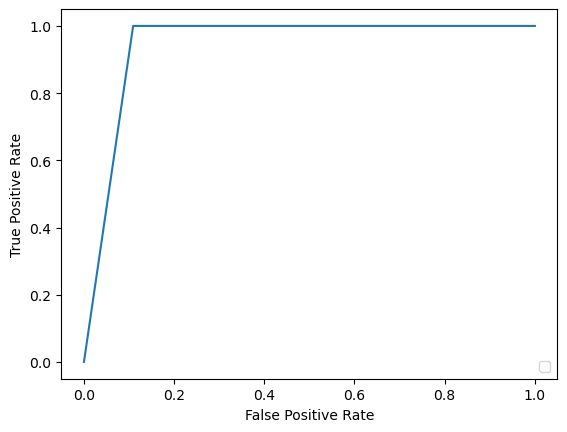

{'baseline accuracy': 0.958041958041958, "K best Features: {'selector__k': 30}": 0.958041958041958, "RFE Best Features: {'selector__n_features_to_select': 30}": 0.958041958041958, "Linear Kernel: {'C': 0.1, 'kernel': 'linear'}": 0.958041958041958}


In [17]:
#tune hyperparameters
#gridseach cv for hyper parameters (c for slack variable, gamma, kernel method)

#linear kernel grid search without gamma or degree parameters

model = SVC()
params = {"C":[.1, 1, 10, 100], "kernel":["linear"]}

clf = GridSearchCV(estimator=model, param_grid = params, cv=kf, scoring="accuracy")
clf.fit(x_train, y_train)


model = SVC(C=clf.best_params_["C"], kernel="linear")
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

display_metrics(y_test, y_preds, data.target_names)

scores["Linear Kernel: " + str(clf.best_params_)] = accuracy_score(y_test, y_preds)

print(scores)


C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

              precision    recall  f1-score   support

   malignant       0.94      0.91      0.93        55
      benign       0.94      0.97      0.96        88

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



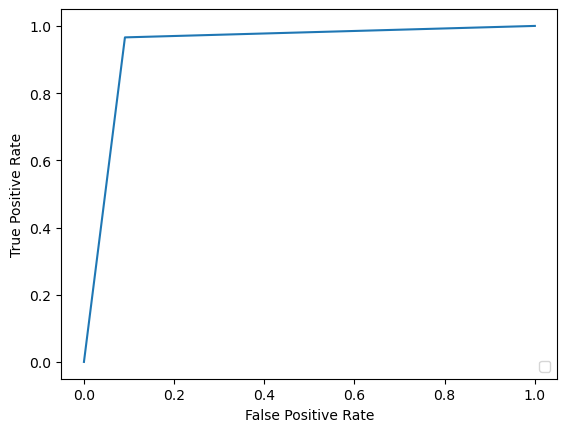

{'baseline accuracy': 0.958041958041958, "K best Features: {'selector__k': 30}": 0.958041958041958, "RFE Best Features: {'selector__n_features_to_select': 30}": 0.958041958041958, "Linear Kernel: {'C': 0.1, 'kernel': 'linear'}": 0.958041958041958, "RBF Kernel: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}": 0.9440559440559441}


In [18]:
#rbf kernel grid search

model = SVC()
params = {"C":[.1, 1, 10, 100], "kernel":["rbf"], "gamma":[.01,.1,.01,10.100]}

clf = GridSearchCV(estimator=model, param_grid = params, cv=kf, scoring="accuracy")
clf.fit(x_train, y_train)

model = SVC(C=clf.best_params_["C"], kernel="rbf", gamma=clf.best_params_["gamma"])
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

display_metrics(y_test, y_preds, data.target_names)

scores["RBF Kernel: " + str(clf.best_params_)] = accuracy_score(y_test, y_preds)

print(scores)

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

              precision    recall  f1-score   support

   malignant       0.98      0.89      0.93        55
      benign       0.94      0.99      0.96        88

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



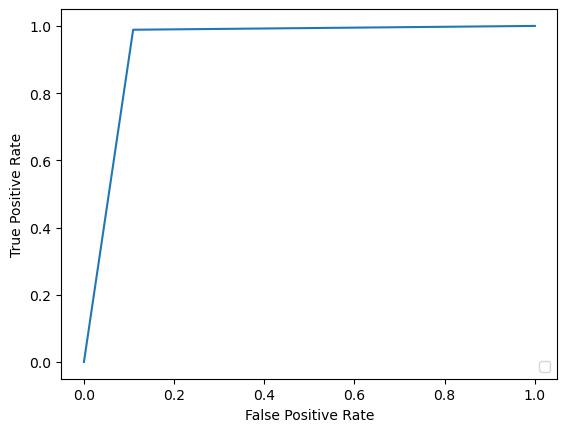

{'baseline accuracy': 0.958041958041958, "K best Features: {'selector__k': 30}": 0.958041958041958, "RFE Best Features: {'selector__n_features_to_select': 30}": 0.958041958041958, "Linear Kernel: {'C': 0.1, 'kernel': 'linear'}": 0.958041958041958, "RBF Kernel: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}": 0.9440559440559441, "Polynomial Kernel: {'C': 10, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}": 0.951048951048951}


In [19]:
#seperate grid search to set degree of polynomial kernel 

model = SVC()
params = {"C":[.1, 1, 10, 100], "kernel":["poly"], "gamma":[.01,.1,1,10,100], "degree":[2,3,4]}

clf = GridSearchCV(estimator=model, param_grid = params, cv=kf, scoring="accuracy")
clf.fit(x_train, y_train)

model = SVC(C=clf.best_params_["C"], kernel="poly", gamma=clf.best_params_["gamma"], degree=clf.best_params_["degree"])
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

display_metrics(y_test, y_preds, data.target_names)

scores["Polynomial Kernel: " + str(clf.best_params_)] = accuracy_score(y_test, y_preds)

print(scores)

In [20]:
#interpret model
#feature importance

#for linear kernel feature importance can be derived from model coefficients
#for non linear kernel other methods such as permutation feature importance can be used 
final_model = SVC(C=.1,kernel="linear")

final_model.fit(x_train, y_train)


feature_coefficients = final_model.coef_[0]

res = {x_train.columns.tolist()[i]: feature_coefficients[i] for i in range(len(feature_coefficients))}

df = pd.DataFrame(res.items(), columns=["feature", "value"])

print(df.sort_values('value', key=abs, ascending=False))

                    feature     value
21            worst texture -0.476016
24         worst smoothness -0.473611
20             worst radius -0.373125
23               worst area -0.366849
22          worst perimeter -0.359660
28           worst symmetry -0.350793
26          worst concavity -0.341058
6            mean concavity -0.331264
10             radius error -0.286353
7       mean concave points -0.280971
13               area error -0.280963
27     worst concave points -0.248325
3                 mean area -0.248017
9    mean fractal dimension  0.247756
0               mean radius -0.229176
12          perimeter error -0.217490
2            mean perimeter -0.216326
1              mean texture -0.202912
15        compactness error  0.176572
5          mean compactness  0.164727
29  worst fractal dimension -0.121583
14         smoothness error -0.113711
11            texture error  0.105690
25        worst compactness  0.092905
19  fractal dimension error  0.090608
17     conca

C:\Users\egrah\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
res = permutation_importance(final_model, x_test, y_test,n_repeats=30,random_state=0)

res = {x_test.columns.tolist()[i]: res.importances_mean[i] for i in range(len(res.importances_mean))}

df = pd.DataFrame(res.items(), columns=["feature", "value"])

print(df.sort_values('value', key=abs, ascending=False))

                    feature     value
24         worst smoothness  0.018881
21            worst texture  0.016317
28           worst symmetry  0.014452
26          worst concavity  0.011189
27     worst concave points  0.010023
14         smoothness error  0.009091
6            mean concavity  0.008625
29  worst fractal dimension  0.007692
7       mean concave points  0.007459
13               area error  0.005361
9    mean fractal dimension -0.005128
1              mean texture  0.004196
10             radius error  0.003963
11            texture error  0.003030
12          perimeter error  0.003030
18           symmetry error -0.002331
22          worst perimeter  0.002331
0               mean radius  0.001865
2            mean perimeter  0.001865
19  fractal dimension error  0.001632
20             worst radius  0.001399
5          mean compactness -0.001399
25        worst compactness  0.001166
3                 mean area  0.001166
23               worst area  0.000699
15        co

In [ ]:
#accuracy of baseline model improved through feature selection and tuning hyperparameters by 2%
#important features identified 